### ELIMINACIÓN DE COLUMNAS

In [1]:
# importamos las librerías que necesitamos
# Importo las librerías necesarias, incorporo los "antiwarning" e instalo motores para poder guardar en parquet:
import pandas as pd
import numpy as np
from IPython.display import display
import warnings
import unicodedata
import re
warnings.filterwarnings("ignore")  # ignora todos los warnings
# Silenciar categorías típicas de pandas:
from pandas.errors import SettingWithCopyWarning, DtypeWarning
warnings.simplefilter("ignore", SettingWithCopyWarning)
warnings.simplefilter("ignore", DtypeWarning)
warnings.simplefilter("ignore", FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from itertools import combinations


In [2]:
# ver todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
# ver todas las filas
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_parquet("EDA y eliminación de duplicados.parquet")

In [5]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,None,2015.722222,None,6,3,None,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,None,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,None,5,"3,0",20,None,15,15,"16280,83$",1972,"195370,00$",None,NaN,Yes
1,52,No,None,2063.388889,None,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,None,None,"43331,17$",0,None,None,14,"3,0",1,None,1,"34,0",5,"3,0",33,None,11,9,None,1971,"199990,00$",None,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,None,"41669,33$",1,None,No,11,"3,0",4,None,0,"22,0",3,None,22,None,11,15,None,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,1771.404762,None,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,None,19,"3,0",2,Full Time,2,None,2,None,20,None,5,6,"14307,50$",1976,"171690,00$",None,NaN,False
4,46,No,None,1582.771346,None,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,None,1,None,5,"3,0",19,None,2,8,"12783,92$",1977,None,None,NaN,0


In [6]:
df.tail()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
1609,36,Yes,travel_rarely,1065.277778,None,3,1,Life Sciences,1,1610,3,0,133.159722,2,3,saLEs ExeCUTiVe,4,Married,"8604,17$","22370,83$",1,Y,None,11,None,1,Full Time,1,None,6,"3,0",16,None,3,7,"8604,17$",1987,"103250,00$",None,NaN,0
1610,45,No,non-travel,458.817460,None,4,2,None,1,1611,3,0,NaN,3,2,LAboRaTOry tECHNiCIAn,2,None,"3705,83$","9635,17$",1,None,None,12,"3,0",2,Part Time,0,None,5,"2,0",9,None,0,8,"3705,83$",1978,"44470,00$",None,NaN,1
1611,39,No,travel_rarely,1032.487286,None,-13,5,None,1,1612,13,0,NaN,4,3,sAlES ExECUTivE,3,Single,None,"21682,23$",0,None,No,18,"3,0",4,Part Time,0,"9,0",3,"3,0",8,None,0,7,None,1984,"100071,84$",None,NaN,Yes
1612,36,No,non-travel,556.256661,None,8,4,Technical Degree,1,1613,1,0,NaN,3,2,SaLes ExecUtIVe,4,Divorced,"4492,84$","11681,39$",4,None,No,13,None,4,Part Time,2,"12,0",3,"3,0",7,None,0,7,"4492,84$",1987,"53914,11$",None,NaN,True
1613,46,No,None,1118.928571,None,7,2,Medical,1,1614,4,0,NaN,3,3,mAnUfactURInG DiRECTOr,3,None,"9037,50$","23497,50$",6,Y,None,13,"3,0",2,Full Time,1,None,3,"3,0",8,None,0,7,"9037,50$",1977,"108450,00$",None,NaN,0


Como ha podido observarse en el Archivo_1_EDA_eliminacion_dups, muchos de los gráficos mostrados, presentan incoherencias en la visualización, mezcla de datos, datos erróneos etc, porque aún no se ha llevado a cabo un adecuado tratamiento y limpieza de datos. 

Del Análisis Exploratorio Inicial llevado a cabo, ya puede inferirse que hay un serie de columnas que no aportan información, tienen demasiados nulos o son redudantes con otras columnas. Por tanto procedemos a eliminar:

- **employeecount**: contiene un único valor repetido en todas las filas y no tiene valor informativo.  

- **over18**: Todos los registros son iguales sin ningún tipo de variabilidad. 

- **numberchildren**: No tiene datos válidos, vacía o completamente nula según el EDA.

- **age**: es redundante, ya que la columna datebirth permite calcular la edad.

- **roledepartment**: tiene un Muy alto porcentaje de nulos (~81%) + categorías inconsistentes.

- **yearsincurrentrole**: Más del 97% de valores nulos , la consideramos no recuperable ni imputable.

- **sameasmonthlyincome**: es una repetición conceptual de otra columna,monthlyincome, además presenta nulos y además su tipo es incorrecto. 

- **hourlyrate**: tiene un porcentaje muy alto de nulos de 75,51% de valores nulos, lo que limita mucho su utilidad y además existe otra variable salarial más fiable y completa,  DailyRate, que  refleja prácticamente la misma información pero con menos problemas de calidad.



In [7]:
# Eliminación de columnas innecesarias o redundantes

columnas_a_eliminar = [
    'employeecount',          
    'over18',                 
    'numberchildren',         
    'age',                   
    'roledepartment',         
    'yearsincurrentrole',                              
    'sameasmonthlyincome',
    'hourlyrate'   
]

# Eliminamos del dataset
df.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')

# Confirmación
print(f" Se eliminaron {len(columnas_a_eliminar)} columnas:")
for col in columnas_a_eliminar:
    print(f"   - {col}")

 Se eliminaron 8 columnas:
   - employeecount
   - over18
   - numberchildren
   - age
   - roledepartment
   - yearsincurrentrole
   - sameasmonthlyincome
   - hourlyrate


In [8]:
df.head()

,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,roledepartament,remotework
0,No,None,2015.722222,None,6,3,None,1,1,0,3,5,resEArch DIREcToR,3,None,"16280,83$","42330,17$",7,No,13,"3,0",3,Full Time,0,None,5,"3,0",20,15,15,1972,"195370,00$",None,Yes
1,No,None,2063.388889,None,1,4,Life Sciences,2,3,0,2,5,ManAGeR,3,None,None,"43331,17$",0,None,14,"3,0",1,None,1,"34,0",5,"3,0",33,11,9,1971,"199990,00$",None,1
2,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,3,3,0,3,5,ManaGER,4,Married,None,"41669,33$",1,No,11,"3,0",4,None,0,"22,0",3,None,22,11,15,1981,"192320,00$",ManaGER - Research & Development,1
3,No,travel_rarely,1771.404762,None,2,4,Medical,4,1,1,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,None,19,"3,0",2,Full Time,2,None,2,None,20,5,6,1976,"171690,00$",None,False
4,No,None,1582.771346,None,3,3,Technical Degree,5,1,1,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,No,12,"3,0",4,None,1,None,5,"3,0",19,2,8,1977,None,None,0


### GESTIÓN DE NULOS

Un paso crucial antes de gestionar los nulos de las variables, es llevar a cabo una conversión adecuada de los tipos de datos que no están en formato correcto, con lo cual, a continuación realizamos una función genérica que recorre todas las columnas del dataframe y en el caso de ser necesario, las convierte al tipo de dato adecuado:

La siguiente función nos devuelve un resumen de todas las columnas que tienen nulos, junto con su tipo de dato ya convertido y el porcentaje de nulos:

CON ESTO GUARDARÍAMOS LOS DATOS Y YA PODEMOS GESTIONAR LOS NULOS ADECUADAMENTE

In [9]:
import pandas as pd
import numpy as np
import re

# --- Configuración de tokens de nulos y booleanos ---
NA_STRINGS = {
    "", " ", "na", "n/a", "nan", "none", "null", "nil", "-", "--", "sin dato", "s/d", "nd"
}
BOOL_TRUE = {"true","t","yes","y","si","sí","s","1","x","✓","verdadero"}
BOOL_FALSE = {"false","f","no","n","0","✗","falso"}

def convertir_tipos_minucioso(
    df: pd.DataFrame,
    min_frac: float = 0.85,
    make_category: bool = True,
    keep_existing_categories: bool = True,
    category_max_unique: int = 200,
    category_frac_threshold: float = 0.5,
    prefer_dayfirst: bool = True
) -> pd.DataFrame:
    """
    Convierte minuciosamente todas las columnas al tipo más adecuado,
    gestionando nulos con dtypes anulables de pandas:
      - enteros:   Int64
      - flotantes: Float64
      - booleanos: boolean
      - texto:     string (opcionalmente category si baja cardinalidad)
      - fechas:    datetime64[ns]

    Parámetros:
      - min_frac: fracción mínima (sobre valores NO nulos) para aceptar una conversión.
      - make_category: si True, convierte string de baja cardinalidad a 'category'.
      - keep_existing_categories: si True, conserva 'category' existente.
      - category_max_unique / category_frac_threshold: reglas para pasar a 'category'.
      - prefer_dayfirst: preferir día/mes/año en empates de fecha.

    Devuelve:
      - DataFrame convertido (copia del original).
    """
    def _normalize_strings(ser: pd.Series) -> pd.Series:
        s = ser.astype("string").str.strip()
        lower = s.str.lower()
        s = s.mask(lower.isin(NA_STRINGS), pd.NA)
        return s

    def _frac(valid_count, total_non_na):
        return valid_count / total_non_na if total_non_na > 0 else 0

    def _detect_boolean(ser: pd.Series, min_frac=0.9):
        s = _normalize_strings(ser)
        total = s.notna().sum()
        lower = s.str.lower()
        m = lower.isin(BOOL_TRUE | BOOL_FALSE)
        if _frac(m.sum(), total) >= min_frac and total > 0:
            mapped = lower.map(lambda v: True if v in BOOL_TRUE else (False if v in BOOL_FALSE else pd.NA))
            return mapped.astype("boolean")
        return None

    def _parse_numeric_candidates(s: pd.Series):
        st = _normalize_strings(s)
        # quita moneda
        st = st.str.replace(r'[\$\€\£\¥\₹]', '', regex=True)
        # porcentajes
        has_pct = st.str.contains(r'%', na=False)
        st = st.str.replace(r'%', '', regex=True)
        # negativos con paréntesis: (123) -> -123
        st = st.str.replace(r'^\((.*)\)$', r'-\1', regex=True)
        # quita espacios y apóstrofes como separadores
        st_no_space = st.str.replace(r"[ '\u00A0]", "", regex=True)

        # A) coma decimal, punto miles
        a = st_no_space.str.replace(r'\.', '', regex=True).str.replace(',', '.', regex=False)
        a_num = pd.to_numeric(a, errors='coerce')

        # B) punto decimal, coma miles
        b = st_no_space.str.replace(',', '', regex=True)
        b_num = pd.to_numeric(b, errors='coerce')

        if has_pct.any():
            a_num = a_num.where(~has_pct, a_num/100)
            b_num = b_num.where(~has_pct, b_num/100)

        total = st.notna().sum()
        return {'comma': a_num, 'dot': b_num, 'total': total}

    def _detect_numeric(ser: pd.Series, min_frac=0.9):
        cand = _parse_numeric_candidates(ser)
        total = cand['total']
        if total == 0:
            return None
        a_nonnull = cand['comma'].notna().sum()
        b_nonnull = cand['dot'].notna().sum()
        if max(a_nonnull, b_nonnull) / total >= min_frac:
            num = cand['comma'] if a_nonnull >= b_nonnull else cand['dot']
            non_na = num.dropna()
            if len(non_na) == 0:
                return num.astype('Float64')
            is_int_like = np.isclose(non_na, np.round(non_na)).all()
            return (num.round().astype('Int64')) if is_int_like else num.astype('Float64')
        return None

    def _detect_excel_serial(ser: pd.Series, min_frac=0.9):
        s = _normalize_strings(ser)
        total = s.notna().sum()
        s = pd.to_numeric(s.str.replace(r'[,\. ]', '', regex=True), errors='coerce')
        s_int = s.where(s.notna(), pd.NA).astype('Int64')
        mask = s_int.notna() & (s_int >= 20000) & (s_int <= 80000)  # rango razonable
        if _frac(mask.sum(), total) >= min_frac and total > 0:
            return pd.to_datetime(s_int.astype('float'), unit='D', origin='1899-12-30', errors='coerce')
        return None

    def _detect_yyyymmdd(ser: pd.Series, min_frac=0.9):
        s = _normalize_strings(ser)
        total = s.notna().sum()
        mask = s.str.fullmatch(r'\d{8}', na=False)
        if _frac(mask.sum(), total) >= min_frac and total > 0:
            return pd.to_datetime(s, format='%Y%m%d', errors='coerce')
        return None

    def _detect_datetime(ser: pd.Series, min_frac=0.9, prefer_dayfirst=True):
        # patrones específicos primero
        for fn in (_detect_yyyymmdd, _detect_excel_serial):
            dt = fn(ser, min_frac=min_frac)
            if dt is not None:
                total = _normalize_strings(ser).notna().sum()
                if _frac(dt.notna().sum(), total) >= min_frac:
                    return dt
        # general
        s = _normalize_strings(ser)
        total = s.notna().sum()
        if total == 0:
            return None
        dt1 = pd.to_datetime(s, errors='coerce', dayfirst=True, infer_datetime_format=True)
        dt2 = pd.to_datetime(s, errors='coerce', dayfirst=False, infer_datetime_format=True)
        n1, n2 = dt1.notna().sum(), dt2.notna().sum()
        best = dt1 if (n1 > n2 or (n1 == n2 and prefer_dayfirst)) else dt2
        if max(n1, n2) / total >= min_frac:
            return best
        return None

    def _maybe_category(ser: pd.Series, max_unique=200, frac_threshold=0.5):
        nun = ser.dropna().nunique()
        if nun <= max_unique and (nun / max(1, len(ser))) <= frac_threshold:
            return ser.astype('category')
        return ser

    out = df.copy()

    for col in out.columns:
        ser = out[col]

        # Normaliza dtypes existentes a anulables
        if pd.api.types.is_bool_dtype(ser):
            out[col] = ser.astype('boolean'); continue
        if pd.api.types.is_integer_dtype(ser):
            try:
                out[col] = ser.astype('Int64')
            except Exception:
                out[col] = pd.to_numeric(ser, errors='coerce').astype('Int64')
            continue
        if pd.api.types.is_float_dtype(ser):
            non_na = pd.Series(ser).dropna()
            if len(non_na) > 0 and np.isclose(non_na, np.round(non_na)).all():
                try:
                    out[col] = pd.Series(ser).round().astype('Int64')
                except Exception:
                    out[col] = pd.Series(ser).astype('Float64')
            else:
                out[col] = pd.Series(ser).astype('Float64')
            continue
        if pd.api.types.is_datetime64_any_dtype(ser):
            out[col] = pd.to_datetime(ser, errors='coerce'); continue
        if pd.api.types.is_categorical_dtype(ser):
            if keep_existing_categories:
                out[col] = ser.astype('category'); continue
            else:
                ser = ser.astype('string')  # se sigue inferencia

        # Inferencia para object/mixed
        bool_ser = _detect_boolean(ser, min_frac=min_frac)
        if bool_ser is not None:
            out[col] = bool_ser; continue

        num_ser = _detect_numeric(ser, min_frac=min_frac)
        if num_ser is not None:
            out[col] = num_ser; continue

        dt_ser = _detect_datetime(ser, min_frac=min_frac, prefer_dayfirst=prefer_dayfirst)
        if dt_ser is not None:
            out[col] = dt_ser; continue

        # Fallback: string (y opcionalmente category)
        s = _normalize_strings(ser).astype('string')
        if make_category:
            s = _maybe_category(s, max_unique=category_max_unique, frac_threshold=category_frac_threshold)
        out[col] = s

    return out

In [10]:
df = convertir_tipos_minucioso(df)

La siguiente función nos muestra el porcentaje de nulos por columna junto con su tipo ya convertido:


In [11]:
def resumen_nulos(df: pd.DataFrame) -> pd.DataFrame:
    """
    Devuelve un DataFrame con las columnas que tienen valores nulos,
    junto con su tipo de dato, número de nulos y porcentaje de nulos.
    """
    total_filas = len(df)
    
    resumen = (
        df.isna()
        .sum()
        .reset_index()
        .rename(columns={'index': 'columna', 0: 'nulos'})
    )
    
    # Filtrar solo columnas con nulos
    resumen = resumen[resumen['nulos'] > 0].copy()
    
    if resumen.empty:
        return pd.DataFrame(columns=['columna', 'tipo', 'nulos', 'porcentaje'])
    
    # Agregar tipo de dato y porcentaje
    resumen['tipo'] = resumen['columna'].apply(lambda c: str(df[c].dtype))
    resumen['porcentaje'] = (resumen['nulos'] / total_filas * 100).round(2)
    
    # Reordenar columnas y ordenar por porcentaje descendente
    resumen = resumen[['columna', 'tipo', 'nulos', 'porcentaje']]
    resumen = resumen.sort_values(by='porcentaje', ascending=False).reset_index(drop=True)
    
    return resumen

In [12]:
resumen = resumen_nulos(df)
print(resumen)

              columna      tipo  nulos  porcentaje
0          department  category   1312       81.29
1     roledepartament    string   1312       81.29
2      businesstravel  category    772       47.83
3      educationfield  category    745       46.16
4            overtime   boolean    676       41.88
5       maritalstatus  category    651       40.33
6   totalworkingyears     Int64    526       32.59
7       monthlyincome   Float64    468       29.00
8       standardhours  category    338       20.94
9              salary     Int64    274       16.98
10  performancerating     Int64    195       12.08
11    worklifebalance     Int64    108        6.69


In [13]:
df.head()

,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,roledepartament,remotework
0,False,<NA>,2015.722222,<NA>,6,3,<NA>,1,1,0,3,5,resEArch DIREcToR,3,<NA>,16280.83,42330.17,7,False,13,3,3,Full Time,0,<NA>,5,3,20,15,15,1972,195370,<NA>,True
1,False,<NA>,2063.388889,<NA>,1,4,Life Sciences,2,3,0,2,5,ManAGeR,3,<NA>,<NA>,43331.17,0,<NA>,14,3,1,<NA>,1,34,5,3,33,11,9,1971,199990,<NA>,True
2,False,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,3,3,0,3,5,ManaGER,4,Married,<NA>,41669.33,1,False,11,3,4,<NA>,0,22,3,<NA>,22,11,15,1981,192320,ManaGER - Research & Development,True
3,False,travel_rarely,1771.404762,<NA>,2,4,Medical,4,1,1,3,4,ReseArCH DIrECtOr,3,Married,14307.5,37199.5,3,<NA>,19,3,2,Full Time,2,<NA>,2,<NA>,20,5,6,1976,171690,<NA>,False
4,False,<NA>,1582.771346,<NA>,3,3,Technical Degree,5,1,1,4,4,sAleS EXECUtIve,1,Divorced,12783.92,33238.2,2,False,12,3,4,<NA>,1,<NA>,5,3,19,2,8,1977,<NA>,<NA>,False


In [14]:
df.tail()

,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,roledepartament,remotework
1609,True,travel_rarely,1065.277778,<NA>,3,1,Life Sciences,1610,3,0,2,3,saLEs ExeCUTiVe,4,Married,8604.17,22370.83,1,<NA>,11,<NA>,1,Full Time,1,<NA>,6,3,16,3,7,1987,103250,<NA>,False
1610,False,non-travel,458.81746,<NA>,4,2,<NA>,1611,3,0,3,2,LAboRaTOry tECHNiCIAn,2,<NA>,3705.83,9635.17,1,<NA>,12,3,2,Part Time,0,<NA>,5,2,9,0,8,1978,44470,<NA>,True
1611,False,travel_rarely,1032.487286,<NA>,-13,5,<NA>,1612,13,0,4,3,sAlES ExECUTivE,3,Single,<NA>,21682.23,0,False,18,3,4,Part Time,0,9,3,3,8,0,7,1984,100072,<NA>,True
1612,False,non-travel,556.256661,<NA>,8,4,Technical Degree,1613,1,0,3,2,SaLes ExecUtIVe,4,Divorced,4492.84,11681.39,4,False,13,<NA>,4,Part Time,2,12,3,3,7,0,7,1987,53914,<NA>,True
1613,False,<NA>,1118.928571,<NA>,7,2,Medical,1614,4,0,3,3,mAnUfactURInG DiRECTOr,3,<NA>,9037.5,23497.5,6,<NA>,13,3,2,Full Time,1,<NA>,3,3,8,0,7,1977,108450,<NA>,False


También podemos visualizar los nulos en forma de gráfica de barras horizontales:

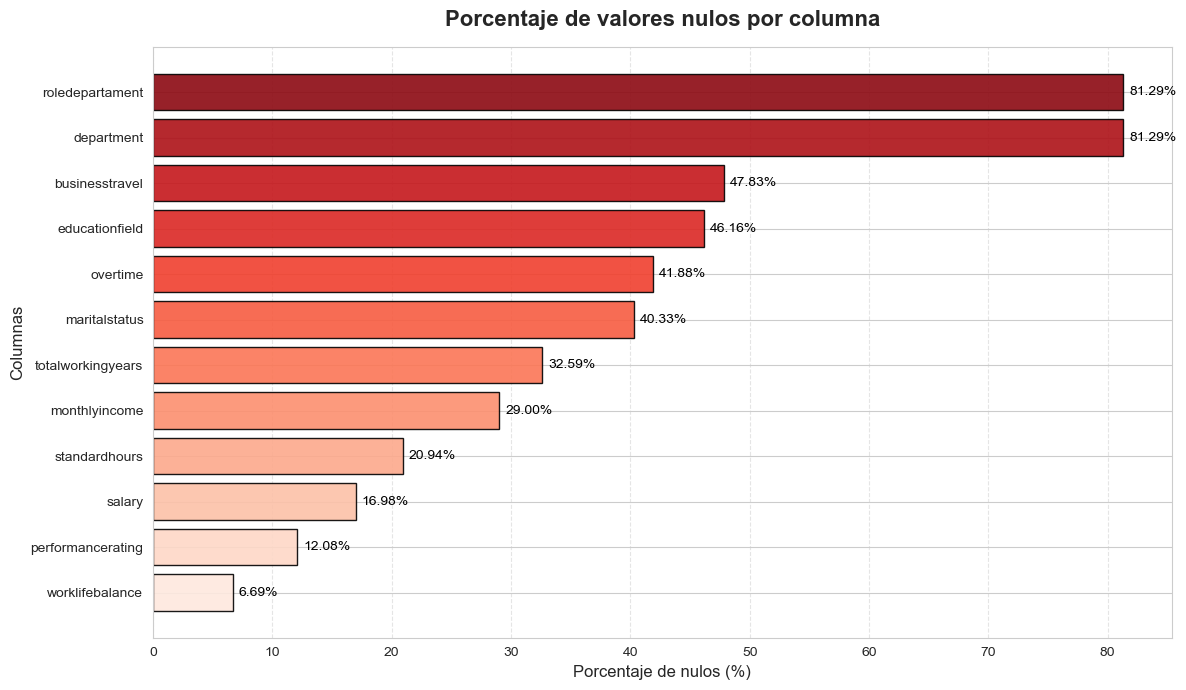

In [15]:

# ====================================================
# Calcular porcentaje de nulos por columna
# ====================================================
nulos_df = pd.DataFrame({
    'Columna': df.columns,
    'Nulos (%)': (df.isna().sum() / len(df) * 100).round(2)
})

# Filtrar solo las columnas con nulos > 0
nulos_df = nulos_df[nulos_df['Nulos (%)'] > 0].sort_values(by='Nulos (%)', ascending=True)

# ====================================================
# Gráfico de barras horizontales
# ====================================================
if nulos_df.empty:
    print("No hay columnas con valores nulos.")
else:
    plt.figure(figsize=(12, 7))
    sns.set_style("whitegrid")

    # Crear paleta de colores rojos degradados
    colors = sns.color_palette("Reds", n_colors=len(nulos_df))

    # Gráfico de barras horizontales
    bars = plt.barh(
        y=nulos_df['Columna'],
        width=nulos_df['Nulos (%)'],
        color=colors,
        edgecolor='black',
        alpha=0.9
    )

    # Añadir porcentajes sobre las barras
    for bar, pct in zip(bars, nulos_df['Nulos (%)']):
        plt.text(
            bar.get_width() + 0.5,  # un poco a la derecha del final de la barra
            bar.get_y() + bar.get_height()/2,
            f"{pct:.2f}%",
            va='center', ha='left', fontsize=10, color='black'
        )

    # Estilo del gráfico
    plt.title('Porcentaje de valores nulos por columna', fontsize=16, fontweight='bold', pad=15)
    plt.xlabel('Porcentaje de nulos (%)', fontsize=12)
    plt.ylabel('Columnas', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

ESTRATEGIAS DE GESTIÓN DE NULOS:


| Columna               | Tipo     | % Nulos | Estrategia aplicada         | Valor imputado / Acción                   |
| --------------------- | -------- | ------- | --------------------------- | ----------------------------------------- |
| **department**        | category | 81.29%  | Eliminada                | Eliminada por >70% nulos                  |
| **roledepartament**   | string   | 81.29%  | Eliminada                | Eliminada por >70% nulos                  |
| **businesstravel**    | category | 47.83%  | Categoría alta nula         | Rellenada con `"Desconocido"`             |
| **educationfield**    | category | 46.16%  | Categoría alta nula         | Rellenada con `"Desconocido"`             |
| **overtime**          | boolean  | 41.88%  | Lógica booleana (40–70%) | Rellenada con `False` (valor conservador) |
| **maritalstatus**     | category | 40.33%  | Categoría media nula        | Rellenada con `"Desconocido"`             |
| **totalworkingyears** | Int64    | 32.59%  | Numérica media nula         | Imputada con mediana                      |
| **monthlyincome**     | Float64  | 29.00%  | Numérica media nula         | Imputada con mediana                      |
| **standardhours**     | category | 20.94%  | Categoría media nula        | Rellenada con `"Desconocido"`             |
| **salary**            | Int64    | 16.98%  | Numérica baja nula          | Imputada con mediana                      |
| **performancerating** | Int64    | 12.08%  | Numérica baja nula          | Imputada con mediana                      |
| **worklifebalance**   | Int64    | 6.69%   | Numérica baja nula          | Imputada con mediana                      |


In [16]:
def imputar_nulos(df: pd.DataFrame, resumen_nulos: pd.DataFrame, eliminar_altamente_nulos: bool = True) -> pd.DataFrame:
    """
    Imputa valores nulos de un DataFrame basándose en el tipo de dato y el porcentaje de nulos.
    Aplica reglas inteligentes según tipo de dato.
    Maneja correctamente columnas categóricas y booleanas.
    No crea columnas *_missing.
    """
    df_out = df.copy()

    for _, fila in resumen_nulos.iterrows():
        col = fila['columna']
        tipo = str(fila['tipo']).lower()
        pct = fila['porcentaje']

        if col not in df_out.columns:
            continue

        # Eliminar columnas altamente nulas
        if eliminar_altamente_nulos and pct > 70:
            print(f"Eliminando '{col}' por alto porcentaje de nulos ({pct:.1f}%)")
            df_out.drop(columns=[col], inplace=True)
            continue

        serie = df_out[col]

        # ------------------ NUMÉRICAS ------------------
        if any(t in tipo for t in ['int', 'float']):
            valor = serie.median()
            df_out[col] = serie.fillna(valor)
            print(f"'{col}' ({tipo}): imputado con mediana = {valor}")

        # ------------------ CATEGORÍAS / STRING ------------------
        elif 'category' in tipo or 'object' in tipo or 'string' in tipo:
            if pct < 10:
                moda = serie.mode(dropna=True)
                valor = moda.iloc[0] if not moda.empty else "Desconocido"
            else:
                valor = "Desconocido"

            # Si es categoría, asegurarse de que el valor existe
            if pd.api.types.is_categorical_dtype(serie):
                if valor not in serie.cat.categories:
                    serie = serie.cat.add_categories([valor])
                df_out[col] = serie.fillna(valor)
            else:
                df_out[col] = serie.fillna(valor)

            print(f"'{col}' ({tipo}): imputado con '{valor}'")

        # ------------------ BOOLEANAS (lógica adaptativa) ------------------
        elif 'bool' in tipo:
            if pct < 10:
                moda = serie.mode(dropna=True)
                valor = moda.iloc[0] if not moda.empty else False
                estrategia = "moda (valor más frecuente)"
            elif pct < 40:
                moda = serie.mode(dropna=True)
                valor = moda.iloc[0] if not moda.empty else False
                estrategia = "moda (revisar posible sesgo)"
            elif pct < 70:
                valor = False
                estrategia = "False (valor conservador por alto % de nulos)"
            else:
                if eliminar_altamente_nulos:
                    print(f"Eliminando '{col}' por alto % de nulos ({pct:.1f}%)")
                    df_out.drop(columns=[col], inplace=True)
                    continue
                else:
                    valor = False
                    estrategia = "False (mantiene columna por configuración)"

            df_out[col] = serie.fillna(valor)
            print(f"'{col}' (boolean): imputado con {valor} → estrategia: {estrategia}")

        # ------------------ FECHAS ------------------
        elif 'datetime' in tipo:
            if pct < 10:
                valor = serie.median(skipna=True)
                df_out[col] = serie.fillna(valor)
                print(f"'{col}' (fecha): imputado con mediana {valor}")
            else:
                print(f"'{col}' (fecha): mantiene NA (sin imputar)")

        # ------------------ TIPOS DESCONOCIDOS ------------------
        else:
            print(f"'{col}' (tipo desconocido: {tipo}) → no se imputa automáticamente")

    return df_out

In [17]:
# Generar la tabla de nulos
resumen = resumen_nulos(df)


El nuevo dataframe con la gestión de nulos realizada es df_limpio y es con el que se seguirá trabajando para el tratamiento de datos y visualizaciones posteriores:

In [18]:
# Imputar según reglas inteligentes
df_limpio = imputar_nulos(df, resumen)



Eliminando 'department' por alto porcentaje de nulos (81.3%)
Eliminando 'roledepartament' por alto porcentaje de nulos (81.3%)
'businesstravel' (category): imputado con 'Desconocido'
'educationfield' (category): imputado con 'Desconocido'
'overtime' (boolean): imputado con False → estrategia: False (valor conservador por alto % de nulos)
'maritalstatus' (category): imputado con 'Desconocido'
'totalworkingyears' (int64): imputado con mediana = 10.0
'monthlyincome' (float64): imputado con mediana = 4492.84
'standardhours' (category): imputado con 'Desconocido'
'salary' (int64): imputado con mediana = 53914.0
'performancerating' (int64): imputado con mediana = 3.0
'worklifebalance' (int64): imputado con mediana = 3.0


In [19]:
# Verificar resultados
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   attrition                 1614 non-null   boolean 
 1   businesstravel            1614 non-null   category
 2   dailyrate                 1614 non-null   Float64 
 3   distancefromhome          1614 non-null   Int64   
 4   education                 1614 non-null   Int64   
 5   educationfield            1614 non-null   category
 6   employeenumber            1614 non-null   Int64   
 7   environmentsatisfaction   1614 non-null   Int64   
 8   gender                    1614 non-null   Int64   
 9   jobinvolvement            1614 non-null   Int64   
 10  joblevel                  1614 non-null   Int64   
 11  jobrole                   1614 non-null   string  
 12  jobsatisfaction           1614 non-null   Int64   
 13  maritalstatus             1614 non-null   catego

In [20]:
df_limpio.head(20)

,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,False,Desconocido,2015.722222,6,3,Desconocido,1,1,0,3,5,resEArch DIREcToR,3,Desconocido,16280.83,42330.17,7,False,13,3,3,Full Time,0,10,5,3,20,15,15,1972,195370,True
1,False,Desconocido,2063.388889,1,4,Life Sciences,2,3,0,2,5,ManAGeR,3,Desconocido,4492.84,43331.17,0,False,14,3,1,Desconocido,1,34,5,3,33,11,9,1971,199990,True
2,False,travel_rarely,1984.253968,4,2,Technical Degree,3,3,0,3,5,ManaGER,4,Married,4492.84,41669.33,1,False,11,3,4,Desconocido,0,22,3,3,22,11,15,1981,192320,True
3,False,travel_rarely,1771.404762,2,4,Medical,4,1,1,3,4,ReseArCH DIrECtOr,3,Married,14307.5,37199.5,3,False,19,3,2,Full Time,2,10,2,3,20,5,6,1976,171690,False
4,False,Desconocido,1582.771346,3,3,Technical Degree,5,1,1,4,4,sAleS EXECUtIve,1,Divorced,12783.92,33238.2,2,False,12,3,4,Desconocido,1,10,5,3,19,2,8,1977,53914,False
5,False,Desconocido,1771.920635,22,3,Medical,6,4,1,3,4,MANAger,4,Desconocido,14311.67,37210.33,3,False,11,3,2,Desconocido,1,10,3,3,22,4,7,1975,53914,True
6,False,Desconocido,1032.487286,25,3,Life Sciences,7,1,1,3,3,Sales ExeCutIVe,1,Desconocido,8339.32,21682.23,7,False,11,3,4,Part Time,0,28,3,2,21,7,9,1964,100072,True
7,False,travel_rarely,556.256661,1,1,Desconocido,8,2,0,3,2,Sales eXEcUTiVe,3,Married,4492.84,11681.39,1,False,25,4,3,Part Time,0,20,3,3,20,11,6,1981,53914,False
8,False,Desconocido,1712.18254,2,5,Desconocido,9,2,1,3,4,mANAGEr,1,Married,13829.17,35955.83,7,False,16,3,2,Full Time,1,22,2,3,18,11,8,1982,165950,True
9,False,travel_frequently,1973.984127,9,3,Desconocido,10,1,0,3,5,reSEaRCH DIrectoR,3,Desconocido,15943.72,41453.67,2,False,17,3,2,Desconocido,1,21,2,4,18,0,11,1982,53914,False


In [21]:
df_limpio.tail(20)

,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
1594,False,Desconocido,447.261905,27,3,Medical,1595,2,1,3,2,hEAltHCarE REpreSentaTiVe,3,Married,3612.5,9392.5,4,False,12,3,1,Part Time,1,11,3,2,8,1,1,1994,43350,True
1595,False,Desconocido,616.984127,2,4,Life Sciences,1596,1,1,4,2,mANUFacTURInG DIREctoR,1,Single,4983.33,12956.67,6,False,12,3,4,Full Time,0,17,2,3,15,4,12,1985,59800,False
1596,False,Desconocido,437.873016,2,2,Medical,1597,3,1,4,2,heALtHCArE RepRESENTATIVE,2,Desconocido,4492.84,9195.33,1,False,24,4,4,Part Time,1,8,2,3,8,3,7,1983,42440,True
1597,False,travel_frequently,1973.984127,8,3,Desconocido,1598,2,0,3,5,maNaGER,4,Desconocido,4492.84,41453.67,1,False,13,3,2,Full Time,1,24,4,2,24,14,9,1981,191325,True
1598,False,travel_rarely,539.396825,1,3,Other,1599,3,1,3,2,maNUFacturing DiRector,2,Desconocido,4356.67,11327.33,0,False,15,3,1,Part Time,1,10,2,3,9,0,5,1987,52280,True
1599,False,travel_rarely,278.571429,23,2,Desconocido,1600,3,0,4,1,resEArCH SCIEnTISt,3,Married,2250.0,5850.0,1,False,24,4,3,Part Time,1,10,3,3,10,0,7,1994,27000,False
1600,True,Desconocido,556.256661,2,1,Medical,1601,3,0,3,2,SAleS ExEcutiVe,4,Single,4492.84,11681.39,4,False,16,3,3,Desconocido,0,10,3,2,9,7,3,1968,53914,True
1601,False,Desconocido,556.256661,-43,4,Desconocido,1602,43,1,3,2,SaLEs ExECUtiVE,2,Desconocido,4492.84,11681.39,1,False,20,4,1,Part Time,0,8,2,3,8,7,5,1995,53914,False
1602,True,Desconocido,244.111111,5,2,Medical,1603,3,1,2,1,reSearCH scientiST,3,Married,1971.67,5126.33,1,False,14,3,1,Part Time,1,8,2,3,8,1,7,1997,23660,True
1603,False,Desconocido,290.03551,9,2,Desconocido,1604,2,0,3,1,RESearch SCieNtISt,1,Desconocido,4492.84,6090.75,1,True,13,3,4,Part Time,0,8,0,3,8,7,1,1979,28111,False


Verificamos que el dataframe ya no tiene nulos:

In [22]:
def verificar_nulos(df: pd.DataFrame, mostrar_detalle: bool = True) -> pd.DataFrame | None:
    """
    Verifica si un DataFrame contiene valores nulos.
    Si existen, muestra el detalle por columna (cantidad y porcentaje).
    Si no existen, muestra un mensaje de confirmación.

    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame a verificar.
    mostrar_detalle : bool, default=True
        Si True, muestra un resumen con columnas que aún tienen nulos.

    Retorna
    -------
    pd.DataFrame | None
        DataFrame resumen con columnas que tienen nulos, o None si no hay nulos.
    """
    total_nulos = df.isna().sum().sum()

    if total_nulos == 0:
        print("No se encontraron valores nulos en el DataFrame.")
        return None
    else:
        print(f"Aún hay {total_nulos} valores nulos en el DataFrame.\n")

        if mostrar_detalle:
            resumen = (
                df.isna()
                .sum()
                .reset_index()
                .rename(columns={'index': 'columna', 0: 'nulos'})
            )
            resumen = resumen[resumen['nulos'] > 0]
            resumen['porcentaje'] = (resumen['nulos'] / len(df) * 100).round(2)
            resumen = resumen.sort_values(by='porcentaje', ascending=False).reset_index(drop=True)

            print("Columnas con valores nulos restantes:")
            display(resumen)

            return resumen

In [23]:
# Verificar si el DataFrame imputado aún tiene nulos
verificar_nulos(df_limpio)

No se encontraron valores nulos en el DataFrame.


### TRATAMIENTO DE DATOS

FUNCIÓN PARA REDONDEAR LAS COLUMNAS NUMÉRICAS A DOS DECIMALES:

In [24]:
# Función para redondear columnas numéricas
# ====================================================
def redondear_numericas(df, decimales=2):
    """
    Redondea todas las columnas numéricas de un DataFrame
    al número de decimales indicado.

    Parámetros:
    -----------
    df : pd.DataFrame
        El DataFrame a procesar.
    decimales : int (por defecto=2)
        Número de decimales al que redondear.

    Retorna:
    --------
    df : pd.DataFrame
        DataFrame con columnas numéricas redondeadas.
    """
    # Detectar columnas numéricas
    cols_num = df.select_dtypes(include=[np.number]).columns.tolist()

    # Redondear solo si existen columnas numéricas
    if cols_num:
        df[cols_num] = df[cols_num].round(decimales)
        print(f"{len(cols_num)} columnas numéricas redondeadas a {decimales} decimales.")
    else:
        print("No se encontraron columnas numéricas para redondear.")

    return df

In [25]:
df_limpio= redondear_numericas(df_limpio)

24 columnas numéricas redondeadas a 2 decimales.


FUNCIÓN PARA NORMALIZAR TODAS LAS COLUMNAS CATEGÓRICAS

In [26]:
def normalizar_categoricas(df: pd.DataFrame) -> pd.DataFrame:
    """
    Normaliza todas las columnas categóricas, object y string de un DataFrame SIN nulos:
      - elimina espacios, guiones bajos y múltiples espacios
      - elimina acentos y caracteres especiales
      - convierte a minúsculas
      - aplica Title Case o Capitalize según el tipo de texto
      - conserva el tipo 'category' si lo tenía
    """
    df_out = df.copy()

    # Incluye columnas de tipo category, object y string
    cols_categoricas = df_out.select_dtypes(include=["object", "category", "string"]).columns
    if len(cols_categoricas) == 0:
        print("No hay columnas categóricas, object ni string para normalizar.")
        return df_out

    for col in cols_categoricas:
        s = df_out[col]
        was_categorical = pd.api.types.is_categorical_dtype(s)

        # Convertir a string solo si no es categoría
        if not was_categorical:
            temp = s.astype(str)
        else:
            temp = s.astype(str)  # se convierte igual pero luego se re-castea

        # --- Limpieza básica ---
        temp = (
            temp.str.strip()                          # quitar espacios
                .str.replace(r"[_\-]+", " ", regex=True)  # _ o - → espacio
                .str.replace(r"\s+", " ", regex=True)      # múltiples espacios → uno
        )

        # --- Eliminar acentos ---
        temp = temp.apply(
            lambda x: "".join(
                c for c in unicodedata.normalize("NFKD", x)
                if not unicodedata.combining(c)
            )
        )

        # --- Pasar a minúsculas ---
        temp = temp.str.lower()

        # --- Ajustar capitalización automática ---
        avg_words = temp.str.split().map(len).mean() if len(temp) > 0 else 1
        if avg_words >= 2 or any(w in col.lower() for w in ["name", "title", "role", "position", "department"]):
            temp = temp.str.title()  # cada palabra con mayúscula
        else:
            temp = temp.str.capitalize()  # solo primera letra

        # Asignar resultado final
        df_out[col] = temp

        # Restaurar tipo category si lo era
        if was_categorical:
            df_out[col] = df_out[col].astype("category")

    print(f"Se han normalizado {len(cols_categoricas)} columnas (category, object y string).")
    return df_out


In [27]:

# Uso: aplicar y guardar la función sobre el df
df_limpio = normalizar_categoricas(df_limpio)

Se han normalizado 5 columnas (category, object y string).


In [28]:
df_limpio.head()

,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,False,Desconocido,2015.72,6,3,Desconocido,1,1,0,3,5,Research Director,3,Desconocido,16280.83,42330.17,7,False,13,3,3,Full time,0,10,5,3,20,15,15,1972,195370,True
1,False,Desconocido,2063.39,1,4,Life sciences,2,3,0,2,5,Manager,3,Desconocido,4492.84,43331.17,0,False,14,3,1,Desconocido,1,34,5,3,33,11,9,1971,199990,True
2,False,Travel rarely,1984.25,4,2,Technical degree,3,3,0,3,5,Manager,4,Married,4492.84,41669.33,1,False,11,3,4,Desconocido,0,22,3,3,22,11,15,1981,192320,True
3,False,Travel rarely,1771.4,2,4,Medical,4,1,1,3,4,Research Director,3,Married,14307.5,37199.5,3,False,19,3,2,Full time,2,10,2,3,20,5,6,1976,171690,False
4,False,Desconocido,1582.77,3,3,Technical degree,5,1,1,4,4,Sales Executive,1,Divorced,12783.92,33238.2,2,False,12,3,4,Desconocido,1,10,5,3,19,2,8,1977,53914,False


FUNCIÓN PARA RENOMBRAR TODAS LAS COLUMNAS

In [29]:
# Diccionario de mapeo
RENAME_MAP = {
    "Businesstravel": "Business travel",
    "Dailyrate": "Daily rate",
    "Distancefromhome": "Distance from home",
    "Educationfield": "Education field",
    "Employeenumber": "Employee number",
    "Environmentsatisfaction": "Environment satisfaction",
    "Jobinvolvement": "Job involvement",
    "Joblevel": "Job level",
    "Jobrole": "Job role",
    "Jobsatisfaction": "Job satisfaction",
    "Maritalstatus": "Marital status",
    "Monthlyincome": "Monthly income",
    "Monthlyrate": "Monthly rate",
    "Numcompaniesworked": "Number companies worked",
    "Overtime": "Overtime",
    "Percentsalaryhike": "Percent salary hike",
    "Performancerating": "Performance rating",
    "Relationshipsatisfaction": "Relationship satisfaction",
    "Standardhours": "Standard hours",
    "Stockoptionlevel": "Stock option level",
    "Totalworkingyears": "Total working years",
    "Trainingtimeslastyear": "Training times last year",
    "Worklifebalance": "Work life balance",
    "Yearsatcompany": "Years at company",
    "education" : "Education",
    "Yearssincelastpromotion": "Years since last promotion",
    "Yearswithcurrmanager": "Years with current manager",
    "Datebirth": "Date birth",
    "Remotework": "Remote work",
    "gender": "Gender",
    "attrition": "Attrition",
    "salary" : "Salary"
}


def renombrar_columnas(df: pd.DataFrame, mapping: dict = RENAME_MAP, usar_guion_bajo: bool = False) -> pd.DataFrame:
    """
    Renombra las columnas de un DataFrame usando un diccionario (mapping).
    - Ignora claves del mapping que no existan en el DataFrame.
    - Mantiene las columnas no incluidas sin cambios.
    - Opcionalmente reemplaza espacios por guiones bajos.
    - No genera errores aunque haya diferencias de mayúsculas/minúsculas.
    """

    # Normalizar claves del mapping y nombres del DataFrame a minúsculas
    mapping_lower = {k.lower(): v for k, v in mapping.items()}
    cols_lower = {c.lower(): c for c in df.columns}

    # Crear un nuevo diccionario con las columnas que realmente existen
    rename_dict = {}
    for c_lower, c_real in cols_lower.items():
        if c_lower in mapping_lower:
            rename_dict[c_real] = mapping_lower[c_lower]

    # Aplicar el renombrado
    df_renombrado = df.rename(columns=rename_dict)

    # Si se pide, reemplazar espacios por guion bajo
    if usar_guion_bajo:
        df_renombrado.columns = df_renombrado.columns.str.replace(" ", "_")

    print(f"{len(rename_dict)} columnas renombradas correctamente.")
    return df_renombrado

In [30]:
df_limpio = renombrar_columnas(df_limpio)

32 columnas renombradas correctamente.


In [31]:
df_limpio.head()

,Attrition,Business travel,Daily rate,Distance from home,Education,Education field,Employee number,Environment satisfaction,Gender,Job involvement,Job level,Job role,Job satisfaction,Marital status,Monthly income,Monthly rate,Number companies worked,Overtime,Percent salary hike,Performance rating,Relationship satisfaction,Standard hours,Stock option level,Total working years,Training times last year,Work life balance,Years at company,Years since last promotion,Years with current manager,Date birth,Salary,Remote work
0,False,Desconocido,2015.72,6,3,Desconocido,1,1,0,3,5,Research Director,3,Desconocido,16280.83,42330.17,7,False,13,3,3,Full time,0,10,5,3,20,15,15,1972,195370,True
1,False,Desconocido,2063.39,1,4,Life sciences,2,3,0,2,5,Manager,3,Desconocido,4492.84,43331.17,0,False,14,3,1,Desconocido,1,34,5,3,33,11,9,1971,199990,True
2,False,Travel rarely,1984.25,4,2,Technical degree,3,3,0,3,5,Manager,4,Married,4492.84,41669.33,1,False,11,3,4,Desconocido,0,22,3,3,22,11,15,1981,192320,True
3,False,Travel rarely,1771.4,2,4,Medical,4,1,1,3,4,Research Director,3,Married,14307.5,37199.5,3,False,19,3,2,Full time,2,10,2,3,20,5,6,1976,171690,False
4,False,Desconocido,1582.77,3,3,Technical degree,5,1,1,4,4,Sales Executive,1,Divorced,12783.92,33238.2,2,False,12,3,4,Desconocido,1,10,5,3,19,2,8,1977,53914,False


FUNCIÓN PARA ORDENAR COLUMNAS

In [32]:

def ordenar_columnas(df, case_insensitive=True):
    cols = sorted(df.columns, key=str.casefold) if case_insensitive else sorted(df.columns)
    return df.loc[:, cols]

df_limpio = ordenar_columnas(df_limpio)

In [33]:
df_limpio.head()

,Attrition,Business travel,Daily rate,Date birth,Distance from home,Education,Education field,Employee number,Environment satisfaction,Gender,Job involvement,Job level,Job role,Job satisfaction,Marital status,Monthly income,Monthly rate,Number companies worked,Overtime,Percent salary hike,Performance rating,Relationship satisfaction,Remote work,Salary,Standard hours,Stock option level,Total working years,Training times last year,Work life balance,Years at company,Years since last promotion,Years with current manager
0,False,Desconocido,2015.72,1972,6,3,Desconocido,1,1,0,3,5,Research Director,3,Desconocido,16280.83,42330.17,7,False,13,3,3,True,195370,Full time,0,10,5,3,20,15,15
1,False,Desconocido,2063.39,1971,1,4,Life sciences,2,3,0,2,5,Manager,3,Desconocido,4492.84,43331.17,0,False,14,3,1,True,199990,Desconocido,1,34,5,3,33,11,9
2,False,Travel rarely,1984.25,1981,4,2,Technical degree,3,3,0,3,5,Manager,4,Married,4492.84,41669.33,1,False,11,3,4,True,192320,Desconocido,0,22,3,3,22,11,15
3,False,Travel rarely,1771.4,1976,2,4,Medical,4,1,1,3,4,Research Director,3,Married,14307.5,37199.5,3,False,19,3,2,False,171690,Full time,2,10,2,3,20,5,6
4,False,Desconocido,1582.77,1977,3,3,Technical degree,5,1,1,4,4,Sales Executive,1,Divorced,12783.92,33238.2,2,False,12,3,4,False,53914,Desconocido,1,10,5,3,19,2,8


Por último se realizan tratamientos específicos de columnas concretas:

Columna Remote work:

In [34]:
# Limpieza de la columna 'Remote work'
# ====================================================
if 'Remote work' in df_limpio.columns:
    df_limpio['Remote work'] = (
        df_limpio['Remote work']
        .astype(str)        # Aseguramos que sea texto
        .str.strip()        # Quitamos espacios
        .str.lower()        # Pasamos a minúsculas para normalizar
        .replace({
            '1': 'yes',
            'true': 'yes',
            '0': 'no',
            'false': 'no'
        })
        .str.capitalize()   # Dejamos formato "Yes" / "No"
    )

    print("Columna 'Remote work' unificada correctamente (Yes/No).")
    
    # Mostrar valores únicos para comprobar
    print("\nValores únicos en 'Remote work':")
    print(df_limpio['Remote work'].unique())

else:
    print("La columna 'Remote work' no existe en el DataFrame.")

Columna 'Remote work' unificada correctamente (Yes/No).

Valores únicos en 'Remote work':
['Yes' 'No']


Columna Marital status:

In [35]:
# Limpieza de la columna 'Marital status'
# ====================================================
if 'Marital status' in df_limpio.columns:
    df_limpio['Marital status'] = (
        df_limpio['Marital status']
        .astype(str)      # Aseguramos que es texto
        .str.strip()      # Quitamos espacios extra
        .str.lower()      # Pasamos a minúsculas para corregir con facilidad
        .replace({
            'marreid': 'married',   # corregimos error tipográfico
            'divorced': 'divorced'  # ejemplo de caso en minúsculas
        })
        .str.title()      # Volvemos a Title Case (Married, Divorced, Single, etc.)
    )
    print("Columna 'Marital status' corregida y normalizada (errores tipográficos arreglados).")

    # Mostrar valores únicos para comprobar
    print("\nValores únicos en 'Marital status':")
    print(df_limpio['Marital status'].unique())

else:
    print("La columna 'Marital status' no existe en el DataFrame.")

Columna 'Marital status' corregida y normalizada (errores tipográficos arreglados).

Valores únicos en 'Marital status':
['Desconocido' 'Married' 'Divorced' 'Single']


In [36]:
# Normalización de columna 'Gender' SIN generar NaN
# ====================================================
if 'Gender' in df_limpio.columns:
    # Convertir todo a texto limpio
    g = df_limpio['Gender'].astype(str).str.strip().str.lower()

    # Normalizar valores más comunes
    replacements = {
        'male': 'M', 'm': 'M', '1': 'M', '1.0': 'M', 'true': 'M',
        'hombre': 'M', 'man': 'M', 'masculino': 'M',
        'female': 'F', 'f': 'F', '0': 'F', '0.0': 'F', 'false': 'F',
        'mujer': 'F', 'woman': 'F', 'femenino': 'F'
    }

    # Reemplazar solo donde haya coincidencias
    df_limpio['Gender'] = g.replace(replacements)

    # Si después del reemplazo quedan valores distintos de M/F,
    # intentamos mantener el valor original en mayúsculas (por si ya era “M” o “F”)
    df_limpio.loc[~df_limpio['Gender'].isin(['M', 'F']), 'Gender'] = (
        df_limpio.loc[~df_limpio['Gender'].isin(['M', 'F']), 'Gender'].str.upper()
    )

    # Asegurar que solo queden M/F, sin eliminar los válidos
    df_limpio.loc[~df_limpio['Gender'].isin(['M', 'F']), 'Gender'] = 'M'  # o 'F' si prefieres

    # Convertir a categoría
    df_limpio['Gender'] = df_limpio['Gender'].astype('category')

    print("'Gender' normalizado correctamente sin crear NaN.")
    print(df_limpio['Gender'].value_counts(dropna=False))
else:
    print("La columna 'Gender' no existe en el DataFrame.")

'Gender' normalizado correctamente sin crear NaN.
Gender
F    971
M    643
Name: count, dtype: int64


Columna Distance from home

In [37]:
# ====================================================
# Corrección de valores negativos en 'Distance from home'
# ====================================================

negativos = (df_limpio['Distance from home'] < 0).sum()

if negativos > 0:
    df_limpio['Distance from home'] = df_limpio['Distance from home'].abs()
    print(f"Se corrigieron {negativos} valores negativos en 'Distance from home' usando valor absoluto.")

Se corrigieron 192 valores negativos en 'Distance from home' usando valor absoluto.


In [38]:
df_limpio.tail()

,Attrition,Business travel,Daily rate,Date birth,Distance from home,Education,Education field,Employee number,Environment satisfaction,Gender,Job involvement,Job level,Job role,Job satisfaction,Marital status,Monthly income,Monthly rate,Number companies worked,Overtime,Percent salary hike,Performance rating,Relationship satisfaction,Remote work,Salary,Standard hours,Stock option level,Total working years,Training times last year,Work life balance,Years at company,Years since last promotion,Years with current manager
1609,True,Travel rarely,1065.28,1987,3,1,Life sciences,1610,3,F,2,3,Sales Executive,4,Married,8604.17,22370.83,1,False,11,3,1,No,103250,Full time,1,10,6,3,16,3,7
1610,False,Non travel,458.82,1978,4,2,Desconocido,1611,3,F,3,2,Laboratory Technician,2,Desconocido,3705.83,9635.17,1,False,12,3,2,Yes,44470,Part time,0,10,5,2,9,0,8
1611,False,Travel rarely,1032.49,1984,13,5,Desconocido,1612,13,F,4,3,Sales Executive,3,Single,4492.84,21682.23,0,False,18,3,4,Yes,100072,Part time,0,9,3,3,8,0,7
1612,False,Non travel,556.26,1987,8,4,Technical degree,1613,1,F,3,2,Sales Executive,4,Divorced,4492.84,11681.39,4,False,13,3,4,Yes,53914,Part time,2,12,3,3,7,0,7
1613,False,Desconocido,1118.93,1977,7,2,Medical,1614,4,F,3,3,Manufacturing Director,3,Desconocido,9037.5,23497.5,6,False,13,3,2,No,108450,Full time,1,10,3,3,8,0,7


In [39]:
df_limpio.head()

,Attrition,Business travel,Daily rate,Date birth,Distance from home,Education,Education field,Employee number,Environment satisfaction,Gender,Job involvement,Job level,Job role,Job satisfaction,Marital status,Monthly income,Monthly rate,Number companies worked,Overtime,Percent salary hike,Performance rating,Relationship satisfaction,Remote work,Salary,Standard hours,Stock option level,Total working years,Training times last year,Work life balance,Years at company,Years since last promotion,Years with current manager
0,False,Desconocido,2015.72,1972,6,3,Desconocido,1,1,F,3,5,Research Director,3,Desconocido,16280.83,42330.17,7,False,13,3,3,Yes,195370,Full time,0,10,5,3,20,15,15
1,False,Desconocido,2063.39,1971,1,4,Life sciences,2,3,F,2,5,Manager,3,Desconocido,4492.84,43331.17,0,False,14,3,1,Yes,199990,Desconocido,1,34,5,3,33,11,9
2,False,Travel rarely,1984.25,1981,4,2,Technical degree,3,3,F,3,5,Manager,4,Married,4492.84,41669.33,1,False,11,3,4,Yes,192320,Desconocido,0,22,3,3,22,11,15
3,False,Travel rarely,1771.4,1976,2,4,Medical,4,1,M,3,4,Research Director,3,Married,14307.5,37199.5,3,False,19,3,2,No,171690,Full time,2,10,2,3,20,5,6
4,False,Desconocido,1582.77,1977,3,3,Technical degree,5,1,M,4,4,Sales Executive,1,Divorced,12783.92,33238.2,2,False,12,3,4,No,53914,Desconocido,1,10,5,3,19,2,8


Columna Overtime

In [40]:
# ====================================================
# Conversión de la columna 'Overtime' (True/False → Sí/No)
# ====================================================

df_limpio['Overtime'] = (
    df_limpio['Overtime']
    .astype(str)        # Convertimos a texto
    .str.strip()        # Quitamos espacios
    .str.lower()        # Pasamos a minúsculas
    .replace({
        'true': 'Yes',
        '1': 'Yes',
        'false': 'NO',
        '0': 'NO'
    })
    .str.capitalize()   # Deja formato "Sí" / "No"
)

print("Columna 'Overtime' convertida correctamente a formato 'Sí/No'.")
print(df_limpio['Overtime'].unique())

Columna 'Overtime' convertida correctamente a formato 'Sí/No'.
['No' 'Yes']


In [41]:
df_limpio.head()

,Attrition,Business travel,Daily rate,Date birth,Distance from home,Education,Education field,Employee number,Environment satisfaction,Gender,Job involvement,Job level,Job role,Job satisfaction,Marital status,Monthly income,Monthly rate,Number companies worked,Overtime,Percent salary hike,Performance rating,Relationship satisfaction,Remote work,Salary,Standard hours,Stock option level,Total working years,Training times last year,Work life balance,Years at company,Years since last promotion,Years with current manager
0,False,Desconocido,2015.72,1972,6,3,Desconocido,1,1,F,3,5,Research Director,3,Desconocido,16280.83,42330.17,7,No,13,3,3,Yes,195370,Full time,0,10,5,3,20,15,15
1,False,Desconocido,2063.39,1971,1,4,Life sciences,2,3,F,2,5,Manager,3,Desconocido,4492.84,43331.17,0,No,14,3,1,Yes,199990,Desconocido,1,34,5,3,33,11,9
2,False,Travel rarely,1984.25,1981,4,2,Technical degree,3,3,F,3,5,Manager,4,Married,4492.84,41669.33,1,No,11,3,4,Yes,192320,Desconocido,0,22,3,3,22,11,15
3,False,Travel rarely,1771.4,1976,2,4,Medical,4,1,M,3,4,Research Director,3,Married,14307.5,37199.5,3,No,19,3,2,No,171690,Full time,2,10,2,3,20,5,6
4,False,Desconocido,1582.77,1977,3,3,Technical degree,5,1,M,4,4,Sales Executive,1,Divorced,12783.92,33238.2,2,No,12,3,4,No,53914,Desconocido,1,10,5,3,19,2,8


Hacemos una última comprobación de que no hay valores nulos ni duplicados en nuestro dataframe:

In [42]:
def comprobar_dataframe(df: pd.DataFrame, nombre: str = "DataFrame") -> None:
    """
    Comprueba si el DataFrame tiene filas duplicadas o valores nulos.
    Muestra un resumen claro y conciso.
    """
    print(f"COMPROBACIÓN DEL DATAFRAME: {nombre}")
    print("=" * 50)

    # --- Duplicados ---
    duplicados = df.duplicated().sum()
    if duplicados > 0:
        print(f"Filas duplicadas: {duplicados:,}")
    else:
        print("No hay filas duplicadas.")

    # --- Nulos ---
    total_nulos = df.isna().sum().sum()
    if total_nulos > 0:
        print(f"Valores nulos totales: {total_nulos:,}")
        resumen_nulos = (
            df.isna()
            .sum()
            .reset_index()
            .rename(columns={"index": "Columna", 0: "Nulos"})
        )
        resumen_nulos = resumen_nulos[resumen_nulos["Nulos"] > 0]
        resumen_nulos["Porcentaje"] = (resumen_nulos["Nulos"] / len(df) * 100).round(2)
        print("\nColumnas con valores nulos:")
        display(resumen_nulos)
    else:
        print("No hay valores nulos.")

    print("=" * 50)

In [43]:
comprobar_dataframe(df_limpio, "df_limpio (post-limpieza)")

COMPROBACIÓN DEL DATAFRAME: df_limpio (post-limpieza)
No hay filas duplicadas.
No hay valores nulos.


df_limpio es el que usaremos para las visualizaciones.

In [44]:
df_limpio.to_parquet("Archivo limpio.parquet", engine="pyarrow", index=False)